# Singular Value Decomposition Examples

- Principal Components Analysis in 2D
- Singular Value Decomposition on Term Frequency Matrix
- Singular Value Decomposition on Image


# Principal Components Analysis Example

Let's play with a toy example problem: finding the principal components of a dataset in two dimensions,
where it is easy to visualize what is happening.  PCA identifies orthogonal directions, sorted in terms of which explains the largest variation in the data.

We'll work with data with many observations of 2 variables:
\begin{equation}
   X = \left( \begin{array}{cc} 
   x^{(1)}_1 &  x^{(1)}_2 \\
   x^{(2)}_1 &  x^{(2)}_2 \\
   x^{(3)}_1 &  x^{(3)}_2 \\
   \vdots & \vdots \\
   \end{array}\right)
\end{equation}
Principal Components Analysis is involves finding the singular value decomposition of the data matrix
(after subtracting off the means for each variable, and scaling by $1/\sqrt{N}$).  

The matrix $X$ has a singular value decomposition
\begin{equation}
  X = U \Sigma V^T
\end{equation}
where $\Sigma$ is a diagonal matrix, $U$ and $V^T$ are unitary matrices whose rows are the left/right singular vectors.

## Eigenvectors and Eigenvalues

- columns of $U$ are eigenvectors of $X^{T} X$ (left eigenvectors)
- columns of $V$ are eigenvectors of $XX^{T}$ (note order) or right eigenvectors
- entries of $\Sigma$ are common eigenvalues of both $XX^{T}$ and $X^{T}X$.

Eigenvalue relation:
\begin{equation}
    A \mathbf{v}_i = \lambda_i \mathbf{v}_i
\end{equation}
$\lambda_i$ are eigenvalues, $\mathbf{v}_i$ are eigenvectors. 
"eigen" is special in German. 
Eigenvectors form a very useful alternative basis for vectors, and representation of matrices.

Can decompose the matrix $A$ as 
\begin{equation}
     A = O \Lambda O^T
\end{equation}
where $\Lambda$ is the diagonal matrix of eigenvalues, and O is the matrix whose columns are the eigenvectors, and all of the matrices are 2x2.

$O$ transforms from original space to eigenvectors, $\Lambda$ scales the vectors$, $O^{T}$ transforms back.  

## PCA from Covariance Matrix

Alternatively, PCA is also the eigenvalue decomposition of the covariance matrix.
The covariance matrix is defined as
\begin{equation}
  \text{cov}_{ij} = \frac{1}{N}\sum_{k=1}^N (x^{(k)}_{i}-\bar{x}_i)(x^{(k)}_j -\bar{x}_j).
\end{equation}
In 2 dimensions, it looks like:
  \begin{align}
     \text{cov} &= \left( \begin{array}{cc} \sigma_1^2 & \sigma_{12} \\ \sigma_{21} & \sigma_2^2\end{array}\right)
    = O \Lambda O^T
  \end{align}
where $\Lambda$ is the diagonal matrix of eigenvalues, and O is the matrix whose columns are the eigenvectors, and all of the matrices are 2x2.


## Constructing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#construct the data as independent normal random variables, with differing variances.
mu=[4,2]
sigma=[3,1]

Ndat=400
Ndim=2
data=np.zeros((Ndat,Ndim))
for i in range(Ndim):
    data[:,i]=np.random.normal(mu[i],sigma[i],Ndat)

#rotate the data by 30 degrees.  
q=-30*np.pi/180
mat=np.array([[np.cos(q),-np.sin(q)],[np.sin(q),np.cos(q)]])
data=np.dot(data,mat)

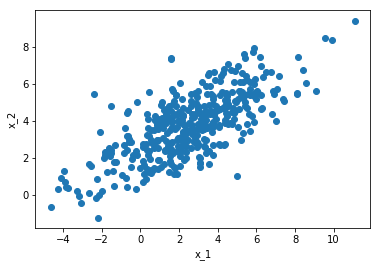

In [3]:
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

## Using scikit-learn's PCA

In [4]:
#Use Scikit-Learn's routine for PCA
from sklearn.decomposition import PCA

In [5]:
pca=PCA()
pca.fit(data)
pca.components_

array([[ 0.86099719,  0.50860972],
       [-0.50860972,  0.86099719]])

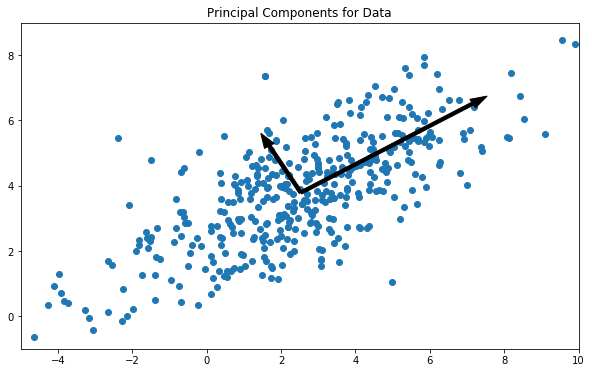

In [67]:
comp=pca.components_
var =pca.explained_variance_  
mu_est=pca.mean_

plt.figure(figsize=(10,6))
plt.scatter(data[:,0],data[:,1])

#Show principal components as arrows from mean obvservation.
for i in range(Ndim):
    #Make length 2 standard deviations.  (similar to 95% confidence interval)
    arr_len=2.0*np.sqrt(var[i])
    #arr_len=(var[i])

    plt.arrow(mu_est[0],mu_est[1],arr_len*comp[i,0],arr_len*comp[i,1],
              color='black',width=.1,length_includes_head=True)
plt.title('Principal Components for Data'    )
plt.axis([-5,10,-1,9])
plt.show()

In [9]:
pca.explained_variance_

array([ 8.46298786,  1.11579271])

Note that the PCA depends on the data you have.  Any outliers will skew the results.  

## SVD on Data Matrix

Let's repeat some of that directly using the SVD apparatus from scipy.

In [10]:
#Doing SVD on data matrix directly.
from scipy.linalg import svd, diagsvd

M,N = data.shape
#center data, and rescale including Bessel correction
centered_data=(data-np.mean(data,axis=0))/np.sqrt(M-1)
#do the SVD
U,s,Vh = svd(centered_data,full_matrices=True)

In [72]:
#Check the results are as advertised.  
Sigma=diagsvd(s,M,N)   #makes desired diagonal matrix with appropriate zero padding
recon=U @ Sigma @ Vh 
print('Reconstructed matrix close to original:',np.allclose(recon,centered_data),'\n')

#Singular Values
print('Singular Values ^2 \t Principal Components Variance' )
print( s*s, pca.explained_variance_)
print('Vh: \n',Vh)
print('PCA_comp: \n',pca.components_)

Reconstructed matrix close to original: True 

Singular Values ^2 	 Principal Components Variance
[ 8.46298786  1.11579271] [ 8.46298786  1.11579271]
Vh: 
 [[-0.86099719 -0.50860972]
 [-0.50860972  0.86099719]]
PCA_comp: 
 [[ 0.86099719  0.50860972]
 [-0.50860972  0.86099719]]


In [14]:
#Check that U is an orthogonal matrix.
np.allclose(U.T @ U,np.eye(400))
U.T @ U

array([[  1.00000000e+00,   1.47885176e-16,   7.84962373e-17, ...,
          6.93889390e-18,   3.68628739e-18,  -1.38777878e-17],
       [  1.47885176e-16,   1.00000000e+00,   5.63785130e-18, ...,
          5.20417043e-18,   2.77555756e-17,   3.46944695e-18],
       [  7.84962373e-17,   5.63785130e-18,   1.00000000e+00, ...,
          2.16840434e-18,   4.87890978e-19,  -1.95156391e-18],
       ..., 
       [  6.93889390e-18,   5.20417043e-18,   2.16840434e-18, ...,
          1.00000000e+00,   1.89735380e-19,   0.00000000e+00],
       [  3.68628739e-18,   2.77555756e-17,   4.87890978e-19, ...,
          1.89735380e-19,   1.00000000e+00,   1.08420217e-19],
       [ -1.38777878e-17,   3.46944695e-18,  -1.95156391e-18, ...,
          0.00000000e+00,   1.08420217e-19,   1.00000000e+00]])

# Dimension Reduction

Let's now use the PCA to reduce the dimension of the dataset (from two to one dimension).

Initially each datapoint can be written as
\begin{equation}
  \mathbf{x} = \sum_{i=1}^D a_i \hat{\mathbf{x}}_i,
\end{equation}
where $a_i$ are real coefficients, and $\hat{\mathbf{x}}_i$ are independent basis vectors (cartesian directions).

The PCA has found an alternative basis (adapted to the data), where the basis vectors point along 
the directions of the largest variance. In terms of the principle components, the data can be written as 
\begin{equation}
  \mathbf{x} = \sum_{i=1}^D b_i \hat{\mathbf{c}}_i,
  \end{equation}
where new coefficients $b_i= (\mathbf{x} - \mathbf{\bar{x}})\cdot\hat{\mathbf{c}}_i$.
This is a perfect reconstruction - no information is lost.

We can reduce the dimensionality of the problem from $D$ to $d$
by restricting the sums to the few components with the largest variance. 
\begin{equation}
  \mathbf{x}_r = \sum_{i=1}^{d} b_i \hat{\mathbf{c}}_i.
\end{equation}

In [15]:
#vectorized dot_product (could include more components with a higher threshold)
#also subtract off mean
data_reduced1=data-mu_est
data_reduced1=np.dot(data_reduced1,comp[:1].T)

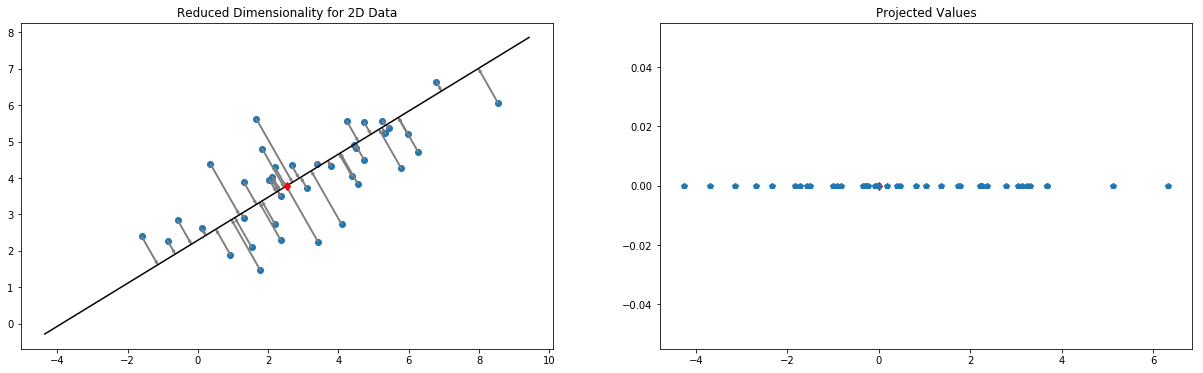

In [18]:
Np=40

plt.figure(figsize=(2*10+1,6))
plt.subplot(121)

#Plot a line through the c_1 axis
xarr = 8*np.array([-comp[0],comp[0]])+mu_est
plt.plot(xarr[:,0],xarr[:,1],'k')

#Show projection from original data points down to reduced axis.
for j in range(Np):
#    for i in range(Ndim):
    #find start and end of vector
    start = data[j]
    end = mu_est+data_reduced1[j]*comp[0]
    dv = end-start
    plt.arrow(start[0],start[1],dv[0],dv[1],
              color='gray',width=.025,length_includes_head=True)
    plt.title('Reduced Dimensionality for 2D Data')
#plot original datapoints
plt.scatter(data[:Np,0],data[:Np,1])
plt.plot(mu_est[0],mu_est[1],'rd')

plt.subplot(122)
plt.plot(0,0,'rd')
plt.plot(data_reduced1[:Np],np.zeros(Np),'p')
plt.title('Projected Values')

plt.show()

## Why do dimensionality reduction?

### 1 - Curse of Dimensionality
1) This is done to avoid the "curse of dimensionality".  As the dimensions grow, typical points are more likely to lie on the surface of the hypervolume ---they will be "extreme" in some fashion, and not appear to have clear connections.  It is also hard to get enough training data to extract statistically significant patterns (since the data is far apart).  

### 2 - Bias-variance tradeoff
2) Another reason is the "bias-variance" tradeoff.  Complicated models tend to overfit the data - under training they will exactly reproduce the training set, but by learning idiosyncracies of the data, rather than meaningful patterns. When applied to new data, they have worse performance - high variance in outputs.  Simple models underfit the data, they don't capture all of the meaningful trends in the data.  This is "bias".  Dimensionality reduction here is treating the small singular values as likely to be noise, and probably not generalizable.  The cutoff is chosen to ideally not introduce too much bias.  

### 3 - Computational Reasons
3) Memory/computational reasons - lots of dimensions can be hard to handle (in terms of fitting in memory, time to compute, etc), and not all of them are probably significant.  So SVD lets you work with a smaller, faster dataset.  

# Dimensionality Reduction on Larger Sparse Data

Dimensionality reduction is particularly useful in cases with sparse data (such as language data), where the number of
dimensions is huge ($10^6$).
This example uses the term-frequency matrix found in non-toxic wikipedia comments.  There are around $10^5$ unique words that show up
in the corpus. That's too many dimensions to work with, and only a few are probably relevant.
The SVD can be used to reduce the dimensionality (with efficient algorithms for sparse data)

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#Load in a subset of data.  (So we have 10k clean comments)
df_clean=pd.read_csv('small_cleaned_comments.tsv.gzip',sep='\t',compression='gzip')
#df_clean=df_com.loc[df_com['median_toxic']>0]

In [22]:
df_clean['comment_clean'].head()

0    This One can make an analogy in mathematical terms by envisioning the distribution of opinions i...
1     The concept of viral meme is not a mainstream academic concept, and only merits the briefest me...
2     Can anyone provide any justification for the spelling Middle Earth used throughout Wikipedia? W...
3     7.11.02 1610 - Mav This open source encyclopedia is an awesome living example of the viral grow...
4     I'm not sure if it's properly called fifth tuning or perfect fifth tuning or what, but it does ...
Name: comment_clean, dtype: object

In [23]:
df_clean.shape

(10761, 8)

In [24]:
#Tokenize the sentences: assign each word an index, and count how many of each word occur in each comment.
#TFIDF include an inverse weighting for how common the words are.  
tfidf_vect=TfidfVectorizer(stop_words='english',lowercase=True,strip_accents='unicode')
X_tfidf=tfidf_vect.fit_transform(df_clean['comment_clean'])

In [25]:
X_tfidf.shape

(10761, 41160)

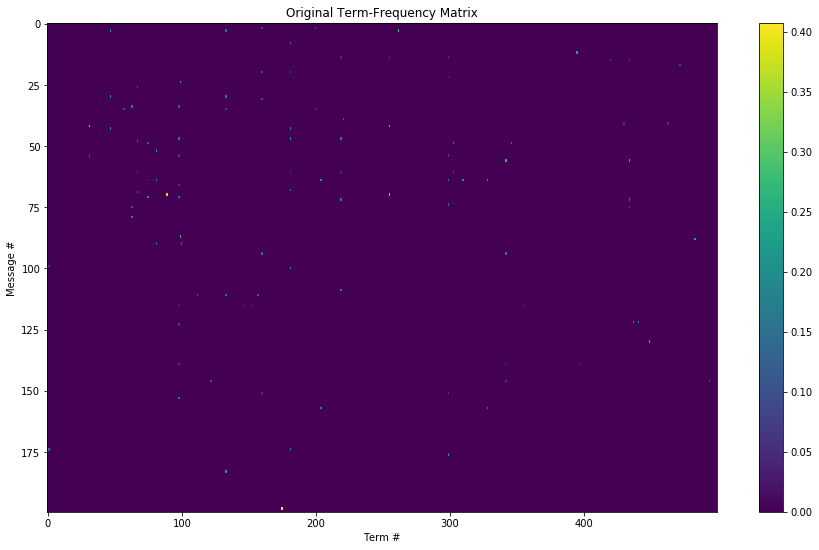

In [73]:
Xsub=X_tfidf[:200,:500]
plt.figure(figsize=(15,9))
plt.imshow(Xsub.toarray(),aspect='auto')
plt.colorbar()
plt.title('Original Term-Frequency Matrix')
plt.ylabel('Message #')
plt.xlabel('Term #')
plt.show()

In [27]:
from sklearn.decomposition import TruncatedSVD

#Compute the SVD for matrix.
#For this sparse routine, choose the number of desired components.

TSVD=TruncatedSVD(n_components=1000,n_iter=20)
TSVD.fit(X_tfidf)

#This can be further truncated.

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=20,
       random_state=None, tol=0.0)

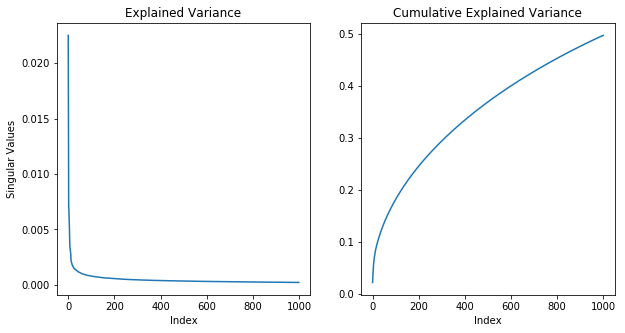

In [34]:
#Look at "explained_variance": A sorted list of singular values
#Singular values here are the entries along the diagonal of D.
svd_var=TSVD.explained_variance_ratio_
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(svd_var)
plt.ylabel('Singular Values')
plt.xlabel('Index')

plt.title('Explained Variance')

plt.subplot(122)
plt.plot(np.cumsum(svd_var))
plt.title('Cumulative Explained Variance')
plt.xlabel('Index')
plt.show()

## Picking a cutoff

- For exploratory work, try just looking at first few values, there might be obvious clustering.  
- Set a fixed amount of the variance to preserve, and choose $d$ based on that when that threshold is crossed
- Pick based on the "elbow" - not very helpful with long-tailed distributions.

In [29]:
#TODO: What does transform do in terms of earlier matrices?
X_trans=TSVD.transform(X_tfidf)

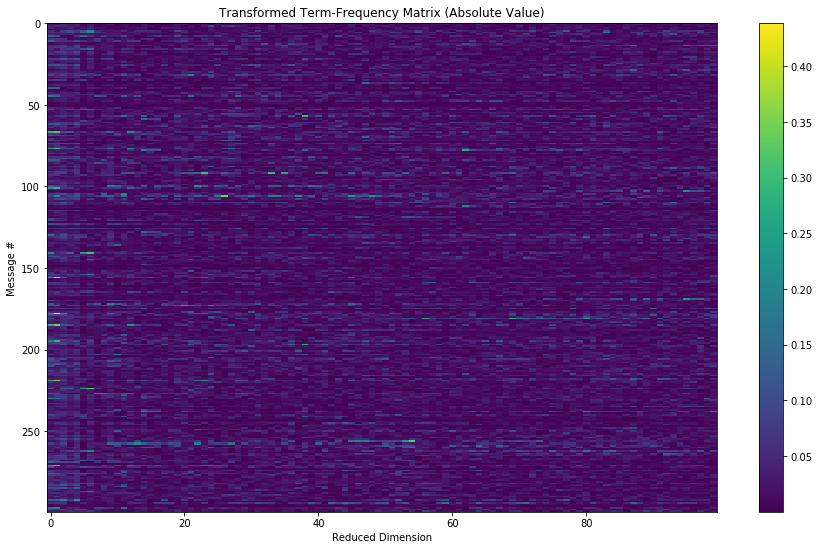

In [30]:
Xsub=X_trans[:300,:100]
plt.figure(figsize=(15,9))
plt.imshow(np.abs(Xsub),aspect='auto')
plt.colorbar()
plt.title('Transformed Term-Frequency Matrix (Absolute Value)')
plt.ylabel('Message #')
plt.xlabel('Reduced Dimension')
plt.show()

In [50]:
#Note connection of comp to A = U D V.  

#check quality of reconstruction: revert to old coordinates
tsvd_comp=TSVD.components_             
##Okay - don't just use this: eats 3GB of RAM.
#X_recon = np.dot(X_trans,comp)
tsvd_sub = tsvd_comp[[0,1,2,99,100,999]]

Need to:
-Show what the biggest components are.  (i.e. what words show up as explaining the most variance)
-Note there is some choice in the manner of decomposition.  (e.g. using UD or U to transform)

In [42]:
#get vocabulary dictionary, then make a dataframe, with entries as rows
#Then sort dataframe by row entry value, and then use that as the index for the counts.
voc_dict=tfidf_vect.vocabulary_
voc_df=pd.DataFrame.from_dict(voc_dict,orient='index')
voc_df1=voc_df.sort_values(by=0)

In [65]:
word_df=pd.DataFrame(tsvd_sub.T,columns=['1','2','3','100','101','1000'],index=voc_df1.index)
word_df.sort_values('101',ascending=False,inplace=True)
pos_wds=word_df.head(n=20).index.values

word_df.sort_values('101',ascending=True,inplace=True)
neg_wds=word_df.head(n=20).index.values

print(pos_wds)
print(neg_wds)

['god' 'lot' 'love' 'book' 'going' 'note' 'link' 'jesus' 'school' 'stop'
 'discussion' 'doing' 'person' 'didn' 'interesting' 'warning' 'thing' '2006'
 'block' 'best']
['added' 'does' 'deleted' 'problem' 'say' 'reverted' 'appreciate' 'idea'
 'username' 'edits' 'let' 'doesn' 'images' 'blocked' 'request' 'question'
 'great' 'nice' 'post' 'message']


# Image Compression with SVD

Let's apply the SVD to an image to see a more meaningful reduction.  

In [106]:
from scipy import misc

img=misc.imread('img_2010.jpg')

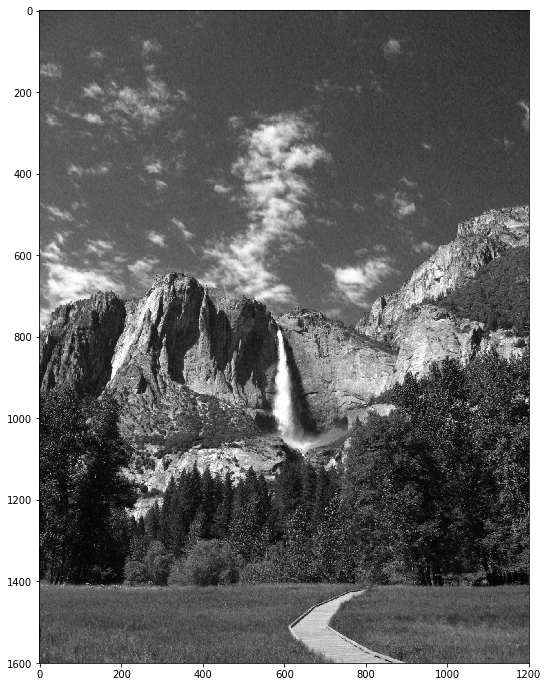

In [115]:
plt.figure(figsize=(9,12))
#We'll just look at one channel here.  
img0=img[:,:,0].T
Mi,Ni=img0.shape
plt.imshow(img0,cmap=plt.cm.gray)
plt.show()

In [108]:
Ui, Si, Vi = svd(img0)

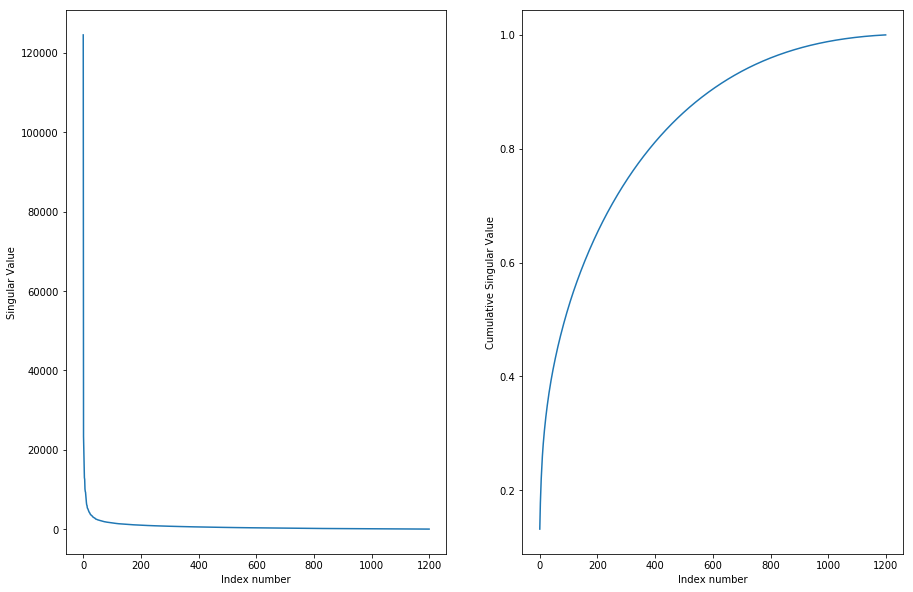

In [143]:
#Plot Singular values:

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(Si)
plt.xlabel('Index number')
plt.ylabel('Singular Value')
plt.subplot(122)
plt.plot(np.cumsum(Si)/np.sum(Si))
plt.xlabel('Index number')
plt.ylabel('Cumulative Singular Value')

plt.show()


In [135]:
img_recon_list=[]
cutoff_list = [1,2,5,10,25,50,100,600,1200]
for cutoff in cutoff_list:
    #only keep singular values up to the cutoff.
    Sigma=np.zeros((Mi,Ni))
    for i in range(cutoff):
        Sigma[i,i] = Si[i]
    #reconstruct the image
    img_recon_list.append(Ui @ Sigma @ Vi   )

Next we can show those reconstructions.  Note the increase in fine detail (clouds, vegetation), this only comes in at higher indices.  Here it's visually meaningful data, but in real data it might be characterized as noise, and unlikely to yield useful, generalizable patterns.  

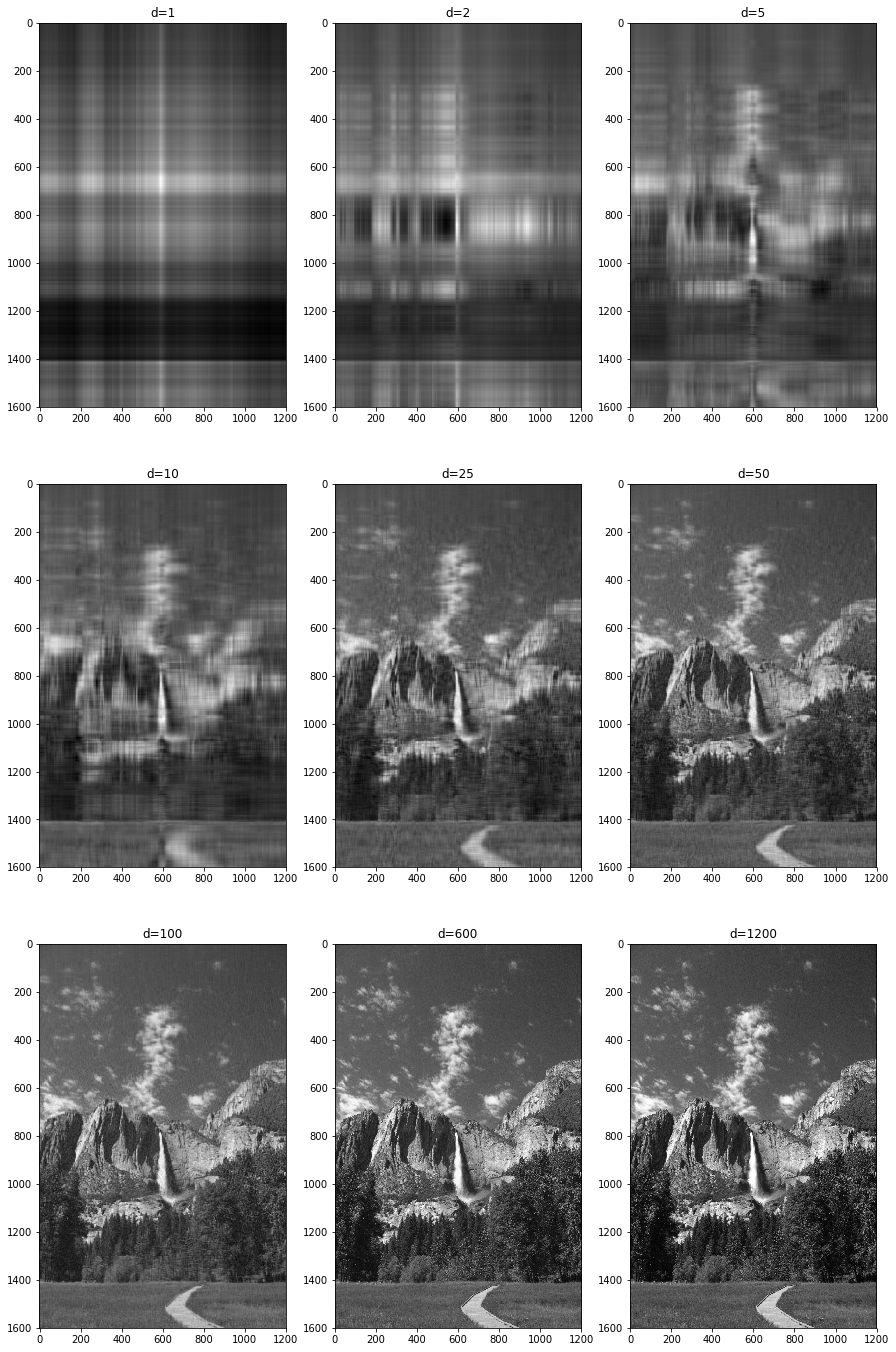

In [138]:
plt.figure(figsize=(15,24))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img_recon_list[i],cmap=plt.cm.gray,aspect='auto')
    plt.title('d={}'.format(cutoff_list[i]))
plt.show()

# References / Further Reading:

- Wikipedia!
- Scikit-Learn Docs 
- Geron - "Hands on Machine Learning with Scikit-Learn and Tensorflow"
- James, Witten, Tibshirani, Hastie - "Introduction to Statistical Learning"
- Hastie, Tibshirani, Friedman - "Elements of Statistical Learning" 
